In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

# 드라이버 경로 불러오기
driver = webdriver.Chrome('C:\workspace\chromedriver')

# 로그인 정보
login_url = 'https://nid.naver.com/nidlogin.login'
naver_id = "qweriii1977"
naver_pw = "fkfk2rj2@!##H"

# 드라이버 실행 후 로그인
driver.get(login_url)
driver.implicitly_wait(2)

# execute_script 함수 사용하여 자바스크립트로 id,pw 넘겨주기
driver.execute_script("document.getElementsByName('id')[0].value=\'" + naver_id + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + naver_pw + "\'")

# 로그인 버튼 클릭하기
driver.find_element(By.XPATH, '//*[@id="log.login"]').click()
time.sleep(1)

# 기기등록 버튼 클릭하기
driver.find_element(By.XPATH, '//*[@id="new.save"]').click()
time.sleep(1)

# 게시글 제목 담을 리스트 생성
article_list_20 = []
article_list_21 = []
article_list_22 = []

# 특정 날짜 휴대폰 판매 페이지 1~10까지 크롤링 => 2020년 1월 ~ 2022년 7월
for year in range(20, 23):
    for month in range(1,13):
        for i in range(1):
            if month < 10:
                month2 = '0' + str(month)

            # 크롤링 진행하려는 카페 주소(중고나라)
            cafe_url = f'https://cafe.naver.com/joonggonara?iframe_url=/ArticleSearchList.nhn%3Fsearch.clubid=10050146%26search.menuid=440%26search.media=0%26search.searchdate=20{year}-{month2}-0120{year}-{month2}-28%26search.defaultValue=1%26userDisplay=15%26search.onSale=1%26search.option=3%26search.sortBy=date%26search.searchBy=0%26search.searchBlockYn=0%26search.query=kg%26search.viewtype=title%26search.page={i}'
            driver.get(cafe_url)
            print(f'{year}년 {month2}월 분석중...')
            # iframe으로 접근
            driver.switch_to.frame('cafe_main')
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            # soup = soup.find_all(class_='article-board m-tcol-c')[1]

            # 네이버 카페 구조 확인후 게시글 내용만 가저오기
            datas = soup.find_all(class_='td_article')
            dates = soup.find_all(class_='td_date')

            for data in datas:
                article_title = data.find(class_='article')
                link = article_title.get('href')
                article_title = article_title.get_text().strip()
                if year == 20:
                    article_list_20.append(article_title)
                elif year == 21:
                    article_list_21.append(article_title)
                else:
                    article_list_22.append(article_title)

driver.close()
print('종료')

C:\Users\ahasu\AppData\Local\Temp\ipykernel_13808\3832930782.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\workspace\chromedriver')


20년 01월 분석중...
20년 02월 분석중...
20년 03월 분석중...
20년 04월 분석중...
20년 05월 분석중...
20년 06월 분석중...
20년 07월 분석중...
20년 08월 분석중...
20년 09월 분석중...
20년 09월 분석중...
20년 09월 분석중...
20년 09월 분석중...
21년 01월 분석중...
21년 02월 분석중...
21년 03월 분석중...
21년 04월 분석중...
21년 05월 분석중...
21년 06월 분석중...
21년 07월 분석중...
21년 08월 분석중...
21년 09월 분석중...
21년 09월 분석중...
21년 09월 분석중...
21년 09월 분석중...
22년 01월 분석중...
22년 02월 분석중...
22년 03월 분석중...
22년 04월 분석중...
22년 05월 분석중...
22년 06월 분석중...
22년 07월 분석중...
22년 08월 분석중...
22년 09월 분석중...
22년 09월 분석중...
22년 09월 분석중...
22년 09월 분석중...
종료


In [11]:
print(len(article_list_20))
print(len(article_list_21))
print(len(article_list_22))

131
179
104


Counter({'원판': 57, '판매': 41, '당일': 40, '덤벨': 33, '봉': 24, '중량': 22, '미개': 21, '직거래': 21, '나우': 20, '배송': 20, '바벨': 17, '너': 16, '벤치': 14, '헬스': 14, '개': 13, '아령': 12, '상품': 11, '당': 11, '카': 11, '구합': 11, '니': 11, '우레': 10, '탄수화물': 9, '세트': 9, '기구': 8, '경량': 8, '프로': 8, '재': 8, '케틀벨': 7, '완료': 6, '신형': 6, '크롬': 6, '각도': 5, '조절': 5, '인클라인': 5, '끝': 5, '운동': 5, '총': 5, '조립': 5, '게이': 5, '구매': 4, '홈': 4, '트레이닝': 4, '가격': 4, '마이': 4, '틴': 4, '랙': 4, '신품': 4, '그': 4, '제트': 4, '블랙': 4, '충남': 4, '교환': 4, '가능': 4, '다음주': 4, '예약판매': 4, '송도': 4, '근처': 4, '바': 3, '제품': 3, '쌍': 3, '트': 3, '평': 3, '치닝디핑': 3, '정리': 3, '가성': 3, '비갑': 3, '일괄': 2, '턱걸이': 2, '팔': 2, '의류': 2, '및': 2, '보충': 2, '제': 2, '은성': 2, '치닝': 2, '중고': 2, '스타': 2, '페럴': 2, '홈짐': 2, '해루': 2, '낚시': 2, '방': 2, '자켓': 2, '완판했던': 2, '무릎': 2, '보호대': 2, '슬리브': 2, '에프': 2, '몬스터': 2, '아이': 2, '솔': 2, '레이': 2, '버팔로': 2, '대구': 2, '조끼': 2, '오프': 1, '랜': 1, '물놀이': 1, '수영복': 1, '러쉬': 1, '가드': 1, '고진': 1, '코어': 1, '경남': 1, '창원': 1, '마산': 1, '김해': 1

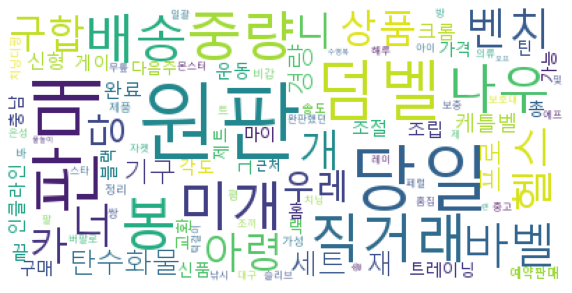

In [12]:
okt = Okt()
tags = []

####

for txt in article_list_20:
    sentences_tag = okt.pos(txt)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            tags.append(word)

# print(okt_nouns)
# print(tag)

# # 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(tags)
print(counts)
tags = counts.most_common(100)
print(tags)

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    
wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()